In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def getRandomTemplate():
    
    HEIGHT: int = 255
    WIDTH: int = 255
    RGB: int = 3
    image = np.ones((HEIGHT, WIDTH, RGB), dtype=np.uint8)
    
    for x in range(HEIGHT):
        for y in range(WIDTH):
            
            image[x, y] = [
                np.random.randint(0, 255),
                np.random.randint(0, 255),
                np.random.randint(0, 255),
            ]
    
    return image

def encryptMessage(message: str): 

    settingKey: dict = {
        "x": 0,
        "y": 0,
        "add":0,
        "endchar": 0
    } 
    
    messageList: list[int] = []
    for char in message:
        val: int = ord(char)
        if val <= 255:
            messageList.append(val)
        else:
            raise ValueError(
                """The message you want to encrypt is not an act, 
                it can only be made up of the ASCII code characters"""
                )
    
    add: int
    while True:
        val = np.random.randint(0, 100)
        validAdd: list[int] = [1 for char in messageList if (char + val) <= 255]
        if len(validAdd):
            settingKey["add"] = str(val)
            add = val
            break
    
    endchar: int
    messageSet = set(messageList)
    while True:
        val = np.random.randint(0,255)
        if val not in messageSet and (val + add):
            settingKey["endchar"] = str(val)
            endchar = val
            break
    
    image = getRandomTemplate()
    coordinateSet = set()
    
    x = np.random.randint(0, 255)
    y = np.random.randint(0, 255)
    coordinateSet.add(f'{x} {y}')
    settingKey["x"] = str(x)
    settingKey["y"] = str(y)
    
    for char in messageList:
        
        while True:
            nextX = np.random.randint(0, 255)
            nextY = np.random.randint(0, 255)
            coordina = f'{nextX} {nextY}'
            
            if coordina not in coordinateSet:
                coordinateSet.add(coordina)
                break
        
        newChar = char + add
        image[x, y] = [nextX, nextY, newChar]
        
        x = nextX
        y = nextY
    else:
        image[x, y] = [nextX, nextY, endchar]
        
    secretKey = "x".join(settingKey.values())
    
    return image, secretKey

def decryptMessage(image, key):
    
    disarmKey = key.split("x")
    settingKey: dict = {
        "x": int(disarmKey[0]),
        "y": int(disarmKey[1]),
        "add":int(disarmKey[2]),
        "endchar": int(disarmKey[3])
    }
    
    x = settingKey["x"]
    y = settingKey["y"]
    subtraction = settingKey["add"]
    endchar = settingKey["endchar"]
    
    message: list[str] = []
    while True:
        
        nextX, nextY, char = image[x, y]
        if char != endchar:
            
            convert = chr(char - subtraction)
            message.append(convert)
            x = nextX
            y = nextY
            
        else:
            break
        
    return "".join(message)

def seeImage(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

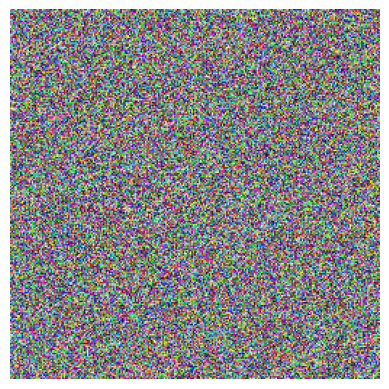

In [59]:
image, secretKey = encryptMessage("Mensaje super secreto que nadie puede llagar a saber")
seeImage(image)

In [61]:
message = decryptMessage(image, secretKey)
print(message)

Mensaje super secreto que nadie puede llagar a saber
